In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

data = pd.read_csv("/content/Dataseted.csv", header = None)
data.drop( 0, axis = 0, inplace = True)
data.head()

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

stress = pd.read_csv("/content/Stresseeg.csv", header = None)
relax = pd.read_csv("/content/Relaxeeg.csv", header = None)
stress = stress.drop(stress.index[0], axis = 0)
relax = relax.drop(relax.index[0], axis = 0)

In [ ]:
stress.head()

,0,1,2,3,4,5,6,7,8,9,...,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199
1,-0.277982571755794,-0.890579722611775,-1.16067349480617,-0.655225410805045,0.51822904025229,1.90388598212328,2.8899787310322,2.74495678358046,1.1315983447836,-2.16825843909807,...,-8.08924213551422,-6.49913121000683,-5.91608052404594,-4.59615949175253,-3.64714632964044,-2.10115029972952,0.16310327691192,2.60875128037922,3.71452522473345,0.648483690802302
2,0.57845153515653,-2.4329493832708,-3.61885863632637,-4.61487564486948,-5.92553162463038,-7.30504703659892,-8.13808903741381,-6.18551460118612,-5.0583823839739,-5.02915287295103,...,1.59653253268207,1.43383039349416,2.23852912695639,5.04218795960287,7.16058253834715,7.54586485829426,5.74624871698354,2.3588921116838,-0.547176053720894,0.991870738157079
3,1.52851959942525,-12.0898449783489,-9.86269399481493,-2.04979357093714,5.25189774545905,9.2463152799433,9.57637453173672,8.27697605643863,6.77418579701617,4.58903225610656,...,-9.50059441046411,-10.0238840310363,-9.61554657995178,-7.1918451471682,-2.10281738914535,4.25380031821401,10.2947861234113,13.7472705548109,11.6450256568911,0.324754126494928
4,-0.615701921610585,1.40665328443816,-0.681152699104398,-3.44049347300004,-5.0446614472528,-4.9142035935416,-3.35225719765286,-1.38629570617352,0.447951783110791,0.675228676759258,...,1.80957495006878,1.06908656134852,0.235878790459875,-0.413213850616897,-0.857541402215238,-0.952064156998059,-0.722557867639832,-0.365173816729055,-0.292769203203275,-1.18123752878359
5,-1.99578384978909,2.27090992137199,3.12354067351965,2.04973431236873,0.071224564425785,-2.16049426742395,-4.26851454832965,-6.67140788900031,-7.77500036720443,-8.60581245922674,...,6.32062671054787,2.78238237931359,-1.14451542295904,-1.58575351417599,-1.41658637461953,-0.230886131862247,1.43653456525546,2.72634020282592,2.44655705806997,-0.935542144469712


In [ ]:
stress = data[data.iloc[:,-1] == "Stressed"]
unstress = data[data.iloc[:,-1] == "Unstressed"]

In [ ]:

print(stress.shape)
print(relax.shape)

(57, 3200)
(63, 3200)


In [ ]:
stress = stress.drop(stress.columns[-1], axis=1)
unstress = unstress.drop(unstress.columns[-1], axis=1)

In [ ]:
stress = np.array(stress).astype(np.float32)
unstress = np.array(relax).astype(np.float32)

In [ ]:
def add_noise(eeg_signal):
  max_amplitude = np.max(np.abs(eeg_signal), axis=0, keepdims=True)
  noise = 0.12 * max_amplitude * np.random.normal(size=eeg_signal.shape)
  return eeg_signal + noise

def scale_signal(eeg_signal, scale_factor=0.1):
  scale = np.random.uniform(1 - scale_factor, 1 + scale_factor)
  return eeg_signal * scale

def time_shift(eeg_signal, max_shift=10):
  shift = np.random.randint(-max_shift, max_shift)
  return np.roll(eeg_signal, shift, axis=0)

def augment_eeg_signal(eeg_signal):
  eeg_signal = add_noise(eeg_signal)
  eeg_signal = scale_signal(eeg_signal)
  eeg_signal = time_shift(eeg_signal)
  return eeg_signal

def augment_and_store_data(X_eeg, augmentation_factor):
  X_augmented = []
  for i in range(len(X_eeg)):
    X_augmented.append(X_eeg[i])
    for _ in range(augmentation_factor):
      augmented_signal = augment_eeg_signal(X_eeg[i])
      X_augmented.append(augmented_signal)
  X_augmented = np.array(X_augmented)
  return X_augmented

print("Before")
print("Augmented Stress dataset size:", stress.shape[0])
print("Augmented Unstress dataset size:", unstress.shape[0])
augmentation_factor = 25
stress = augment_and_store_data(stress, augmentation_factor=augmentation_factor)

unstress = augment_and_store_data(unstress, augmentation_factor=augmentation_factor)
print("After")
print("Augmented Stress dataset size:", stress.shape[0])
print("Augmented Unstress dataset size:", unstress.shape[0])


Before
Augmented Stress dataset size: 57
Augmented Unstress dataset size: 63
After
Augmented Stress dataset size: 1482
Augmented Unstress dataset size: 1638


In [ ]:
stress_y = ["Stressed"] * stress.shape[0]
unstress_y = ["Unstressed"] * unstress.shape[0]

In [ ]:
data = np.concatenate((stress, unstress), axis=0)
Y = stress_y + unstress_y
Y = np.array(Y).reshape(-1, 1)

In [ ]:
print(data.shape)
print(Y.shape)

(3120, 3200)
(3120, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

data = sc.fit_transform(data)

In [ ]:
alpha_band = data[:,:3200]
beta_band = data[:,3200:6400]
gamma_band = data[:,6400:9600]

In [ ]:
X = np.stack([alpha_band, beta_band, gamma_band], axis = -1)
print(X.shape)

(4332, 3200, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model

input_shape = (3200, 1)
cnn_model = create_cnn_model(input_shape)
cnn_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=11, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 3200, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3200, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1600, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1600, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1600, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 800, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 800, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 800, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 800, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 400, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 400, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,276,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,310,913 (12.63 MB)

 Trainable params: 3,310,465 (12.63 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
X = data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
Y = le.fit_transform(Y)



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.7, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(2184, 3200)
(280, 3200)
(656, 3200)


In [ ]:
history = cnn_model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    epochs=100,
    batch_size=32, callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.5124 - loss: 1.3840 - val_accuracy: 0.4857 - val_loss: 2.9595 - learning_rate: 1.0000e-04
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6422 - loss: 0.9279 - val_accuracy: 0.4857 - val_loss: 3.1443 - learning_rate: 1.0000e-04
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7482 - loss: 0.8176 - val_accuracy: 0.4929 - val_loss: 3.5866 - learning_rate: 1.0000e-04
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8144 - loss: 0.6981 - val_accuracy: 0.5750 - val_loss: 2.2895 - learning_rate: 1.0000e-04
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8606 - loss: 0.6223 - val_accuracy: 0.7286 - val_loss: 0.9260 - learning_rate: 1.0000e-04
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9012 - loss: 0.5235 - val_accuracy: 0.8607 - val_loss: 0.6541 - learning_rate: 1.0000e-04
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy

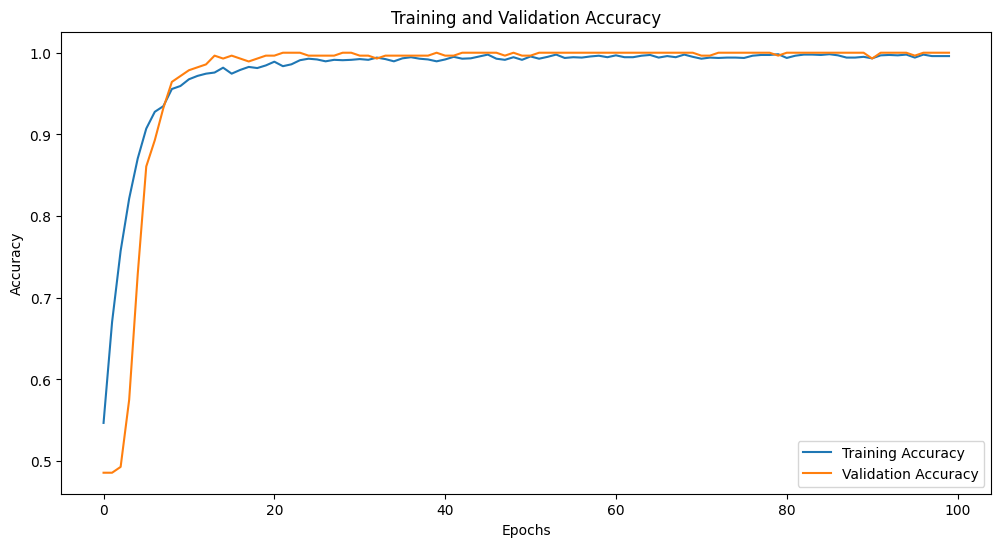

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

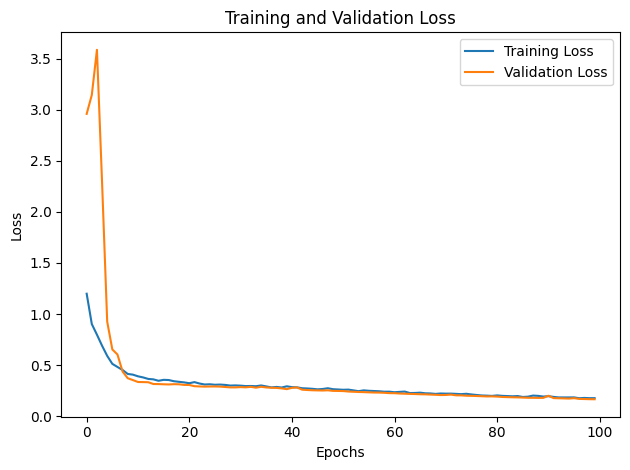

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate([X_test, X_test], Y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.1656
Test Loss: 0.16563890874385834
Test Accuracy: 1.0


In [ ]:
y_pred = cnn_model.predict([X_test, X_test])
y_pred_classes = (y_pred > 0.5).astype("int32")

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


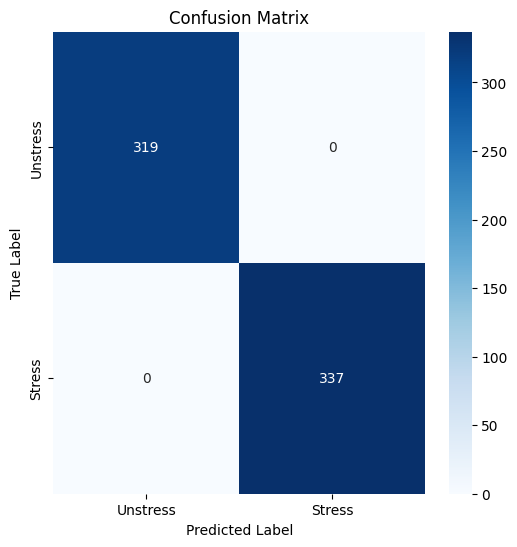

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unstress', 'Stress'], yticklabels=['Unstress', 'Stress'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


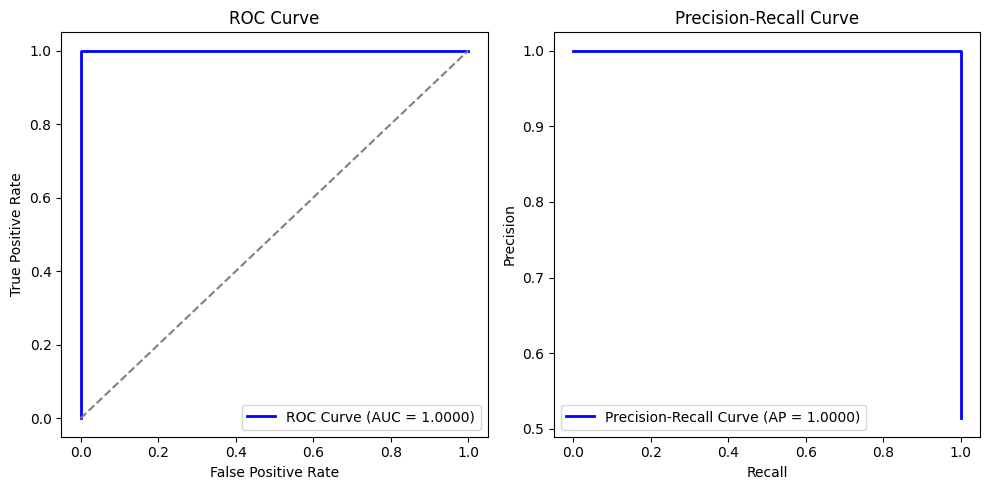

AUC Score: 1.0000
Average Precision Score: 1.0000


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred_prob = cnn_model.predict([X_test, X_test])
y_true = Y_test

# Calculate AUC Score
auc_score = roc_auc_score(y_true, y_pred_prob)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
average_precision = average_precision_score(y_true, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Print AUC and Precision-Recall values
print(f'AUC Score: {auc_score:.4f}')
print(f'Average Precision Score: {average_precision:.4f}')


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

precision = precision_score(Y_test, y_pred_classes)
recall = recall_score(Y_test, y_pred_classes)
f1 = f1_score(Y_test, y_pred_classes)
f2 = fbeta_score(Y_test, y_pred_classes, beta=2)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'F2 Score: {f2}')

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
F2 Score: 1.0


In [ ]:
cnn_model.save("cnn_model.h5")
print("Model saved successfully as 'cnn_model.keras'")

Model saved successfully as 'cnn_model.keras'


In [ ]:
pip install tflite-support

In [ ]:
import tensorflow as tf
from keras.models import load_model
modleel = load_model("/content/cnn_model.h5")

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modleel)
tflite_model = converter.convert()

with open(tflite_model, 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp6moywisc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3200, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135310030779984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030779408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030779792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030776336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030780176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030778832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030780560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030775952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030768080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030766160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135310030778640: Te

ValueError: embedded null byte

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
tflite_model = converter.convert()

with open('tf_lite_model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp2y38kz3s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3200, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134674864695696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674864697616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674864699728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674864701072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674864700880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674864698768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674700485264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674700486992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674700487184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674700487760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134674700486224: T